# Results

In [1]:
import seaborn
import numpy as np
import pandas as pd
import scipy.stats as sc
import matplotlib.pyplot as pl
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
pd.options.display.max_columns = None

/Users/JordanVani/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/JordanVani/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Load Data

In [2]:
# Load data.
data = pd.read_csv('/Users/JordanVani/Documents/NYU/ADS/Report/Vision_Zero/Street_Redesign/mergedv3.csv')
# Drop precincts without a population.
data = data[data['Total_Pop'] > 100] 
# Split data into pre and post Vision Data.
preVZ = data.query('Year == 2013')
postVZ = data.query('Year in [2014, 2015]')


## Has there been a change in injuries pre & post Vision Zero?
#### Absolute Numbers

In [3]:
for i in data.columns[46:54]:
    print (i.title() + ' (p-value): ' + 
           str(sc.ttest_ind(preVZ[i], postVZ[i])[1].round(4)) +
           ' (Stat: ' + str(sc.ttest_ind(preVZ[i], postVZ[i])[0]) + ')')


Number Of Persons Injured (p-value): 0.304 (Stat: 1.03018538363)
Number Of Persons Killed (p-value): 0.2413 (Stat: 1.17496290224)
Number Of Pedestrians Injured (p-value): 0.0415 (Stat: 2.05035063098)
Number Of Pedestrians Killed (p-value): 0.1245 (Stat: 1.54215432271)
Number Of Cyclist Injured (p-value): 0.8783 (Stat: -0.153320319511)
Number Of Cyclist Killed (p-value): 0.1036 (Stat: -1.63441075456)
Number Of Motorist Injured (p-value): 0.4593 (Stat: 0.741293195441)
Number Of Motorist Killed (p-value): 0.3935 (Stat: 0.854914107984)


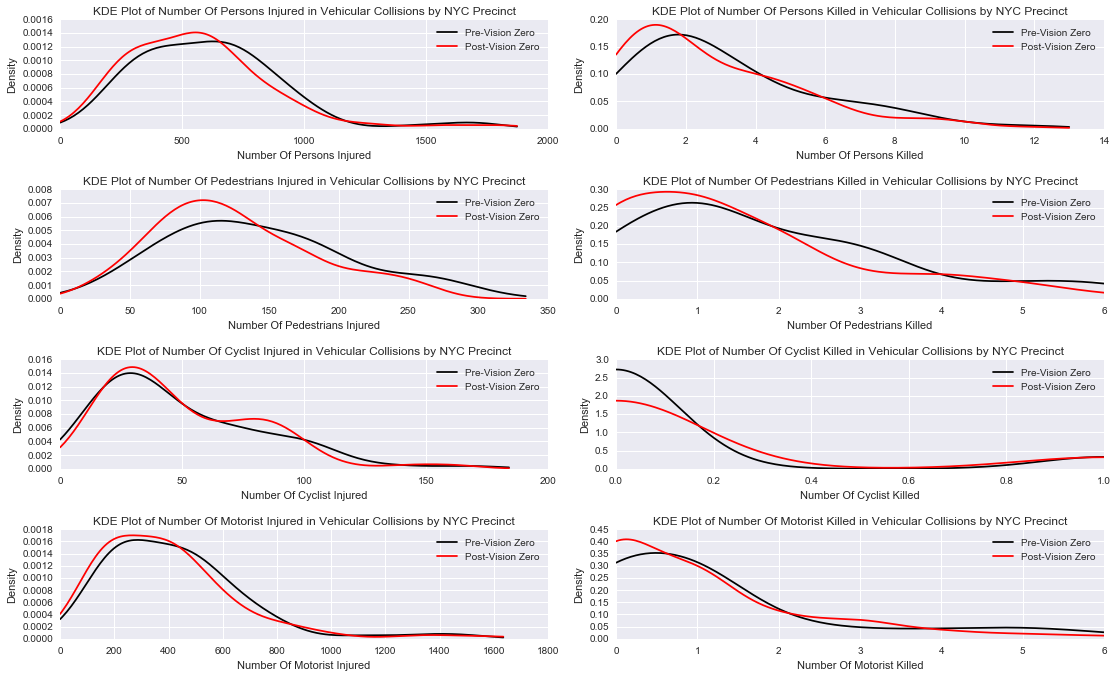

In [4]:
# Create matplotlib object.
fig1, ([ax1, ax2], [ax3, ax4],
       [ax5, ax6], [ax7, ax8]) = pl.subplots(nrows = 4, ncols = 2, figsize = (16, 10))
fig1.tight_layout(pad=4)

# Zip axes and data columns.
z = zip(fig1.axes, data.columns[46:54])

# Plot all incident columns.
for item in z:
    xs = np.linspace(0, preVZ[item[1]].max() + preVZ[item[1]].max() / 10, 200)
    item[0].set_title('KDE Plot of ' + item[1].title() + ' in Vehicular Collisions by NYC Precinct')
    item[0].plot(xs, sc.gaussian_kde(preVZ[item[1]])(xs), c='k', label='Pre-Vision Zero')
    item[0].plot(xs, sc.gaussian_kde(postVZ[item[1]])(xs), c='r', label='Post-Vision Zero')
    item[0].set_ylabel('Density')
    item[0].set_xlabel(item[1].title())
    item[0].legend()


#### Per Capita Injuries

In [5]:
for i in data.columns[46:54]:
    print (i.title() + ' Per Capita (p-value): ' + 
           str(sc.ttest_ind(preVZ[i] / preVZ['Total_Pop'], 
                            postVZ[i] / postVZ['Total_Pop'])[1].round(4)))
    

Number Of Persons Injured Per Capita (p-value): 0.252
Number Of Persons Killed Per Capita (p-value): 0.0789
Number Of Pedestrians Injured Per Capita (p-value): 0.3187
Number Of Pedestrians Killed Per Capita (p-value): 0.039
Number Of Cyclist Injured Per Capita (p-value): 0.9569
Number Of Cyclist Killed Per Capita (p-value): 0.2711
Number Of Motorist Injured Per Capita (p-value): 0.199
Number Of Motorist Killed Per Capita (p-value): 0.4165


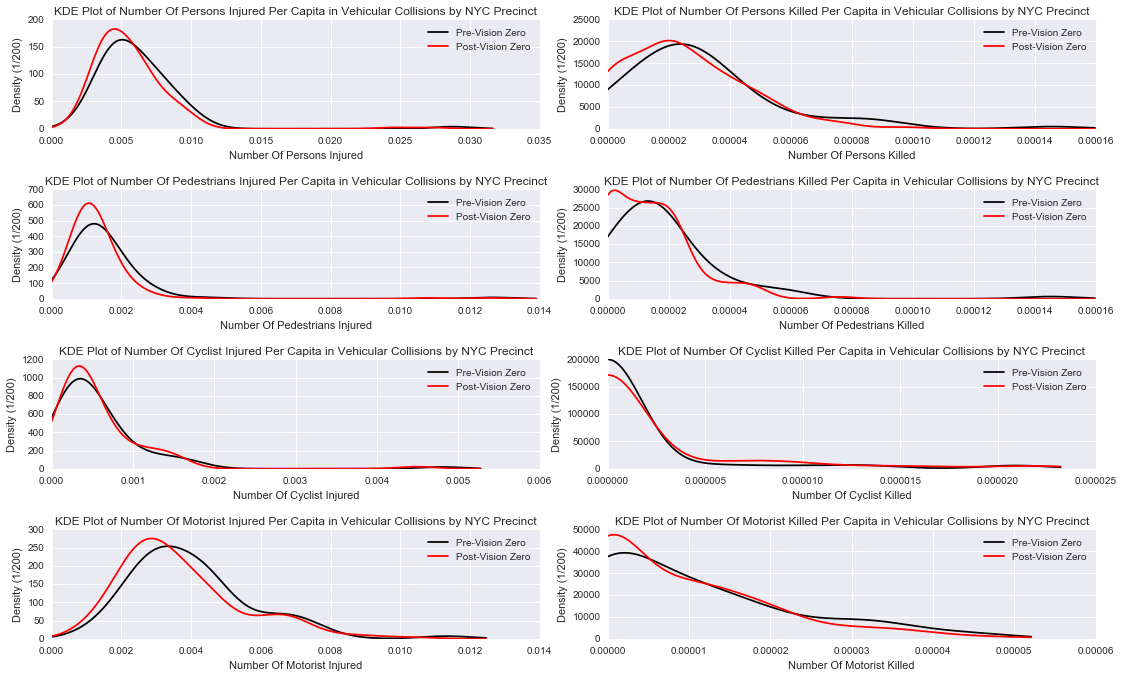

In [6]:
# Create matplotlib object.
fig1, ([ax1, ax2], [ax3, ax4],
       [ax5, ax6], [ax7, ax8]) = pl.subplots(nrows = 4, ncols = 2, figsize = (16, 10))
fig1.tight_layout(pad=4)

# Zip axes and data columns.
z = zip(fig1.axes, data.columns[46:54])

# Plot all incident columns.
for item in z:
    xs = np.linspace(0, (preVZ[item[1]] / preVZ['Total_Pop']).max() + \
                     (preVZ[item[1]] / preVZ['Total_Pop']).max() / 10, 200)
    item[0].set_title('KDE Plot of ' + item[1].title() + \
                      ' Per Capita in Vehicular Collisions by NYC Precinct')
    item[0].plot(xs, sc.gaussian_kde(preVZ[item[1]] / preVZ['Total_Pop'])(xs),
                 c='k', label='Pre-Vision Zero')
    item[0].plot(xs, sc.gaussian_kde(postVZ[item[1]] / postVZ['Total_Pop'])(xs),
                 c='r', label='Post-Vision Zero')
    item[0].set_ylabel('Density (1/200)')
    item[0].set_xlabel(item[1].title())
    item[0].legend()


#### Per Area Injuries

In [7]:
for i in data.columns[46:54]:
    print (i.title() + ' Per Area (p-value): ' + 
           str(sc.ttest_ind(preVZ[i] / preVZ['Shape_Area'], 
                            postVZ[i] / postVZ['Shape_Area'])[1].round(4)))
    

Number Of Persons Injured Per Area (p-value): 0.2383
Number Of Persons Killed Per Area (p-value): 0.1155
Number Of Pedestrians Injured Per Area (p-value): 0.2561
Number Of Pedestrians Killed Per Area (p-value): 0.1662
Number Of Cyclist Injured Per Area (p-value): 0.9474
Number Of Cyclist Killed Per Area (p-value): 0.3769
Number Of Motorist Injured Per Area (p-value): 0.1382
Number Of Motorist Killed Per Area (p-value): 0.0693


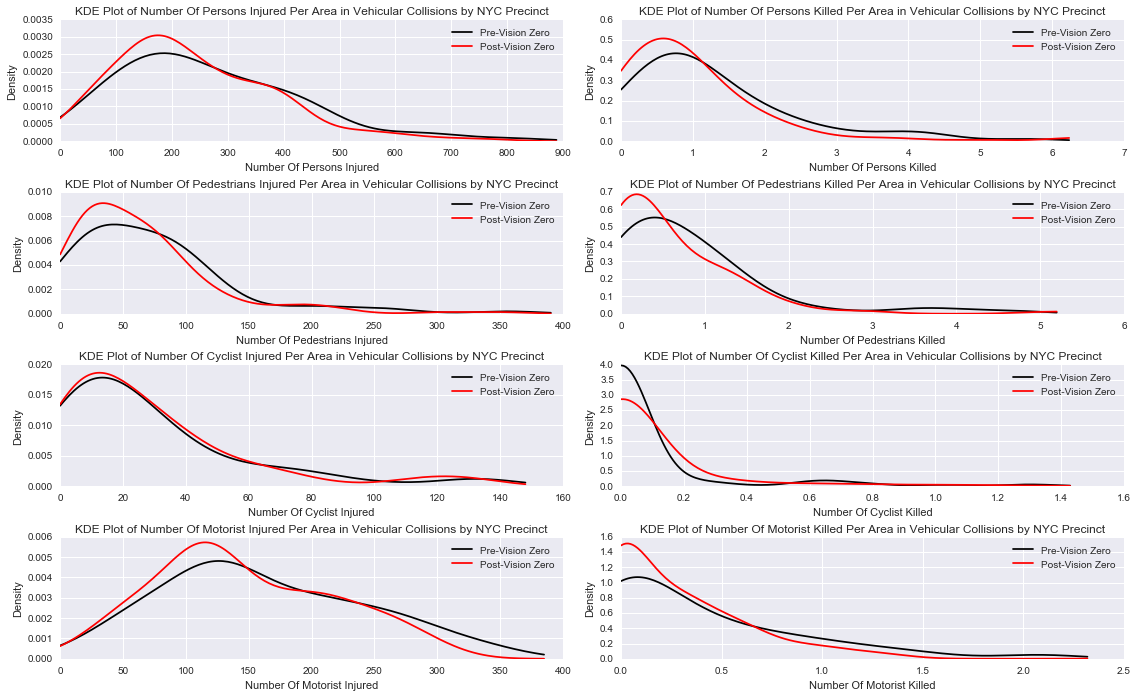

In [8]:
# Create matplotlib object.
fig1, ([ax1, ax2], [ax3, ax4],
       [ax5, ax6], [ax7, ax8]) = pl.subplots(nrows = 4, ncols = 2, figsize = (16, 10))
fig1.tight_layout(pad=3)

# Zip axes and data columns.
z = zip(fig1.axes, data.columns[46:54])

# Plot all incident columns.
for item in z:
    xs = np.linspace(0, (preVZ[item[1]] / preVZ['Shape_Area']).max() + \
                     (preVZ[item[1]] / preVZ['Shape_Area']).max() / 10, 200)
    item[0].set_title('KDE Plot of ' + item[1].title() + \
                      ' Per Area in Vehicular Collisions by NYC Precinct')
    item[0].plot(xs, sc.gaussian_kde(preVZ[item[1]] / preVZ['Shape_Area'])(xs),
                 c='k', label='Pre-Vision Zero')
    item[0].plot(xs, sc.gaussian_kde(postVZ[item[1]] / postVZ['Shape_Area'])(xs),
                 c='r', label='Post-Vision Zero')
    item[0].set_ylabel('Density')
    item[0].set_xlabel(item[1].title())
    item[0].legend()


#### Findings:
* The total number of pedestrians injured in NYC precincts has significantly decreased since Vision Zero.
* Killed pedestrians per capita in NYC precincts has significantly decreased since Vision Zero.
* All but cyclist injuries & deaths show a downward trend post Vision Zero.

## Has Ticketing Increased as a Result of Vision Zero?

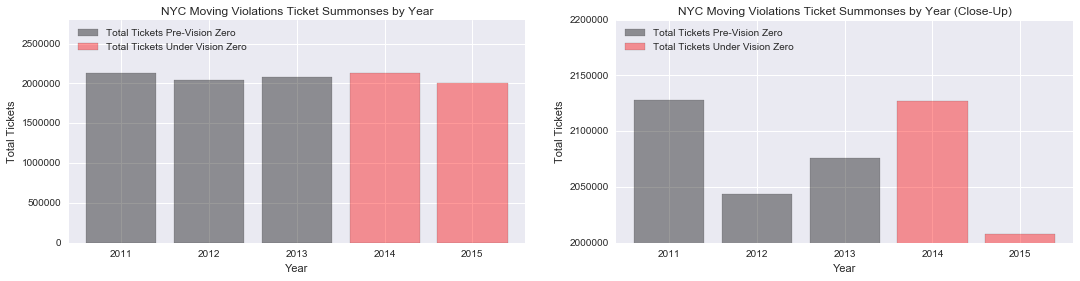

In [9]:
# Load original ticketing data
df = pd.read_csv('/Users/JordanVani/Documents/NYU/ADS/Report/Vision_Zero/TicketSummonses/Annual_Data_City/NYCTicketSummonses.csv',
                 index_col = 0)

# Plot total tickets by year
fig1, (ax1, ax2) = pl.subplots(nrows=1, ncols=2, figsize=(18, 4))
ax1.get_xaxis().get_major_formatter().set_useOffset(False)
ax1.bar(df.Year[0:3] - 0.4, df.Total_Sum[0:3], color='k', alpha=0.4, label='Total Tickets Pre-Vision Zero')
ax1.bar(df.Year[3:5] - 0.4, df.Total_Sum[3:5], color='r', alpha=0.4, label='Total Tickets Under Vision Zero')
ax1.set_ylabel('Total Tickets')
ax1.set_xlabel('Year')
ax1.set_title('NYC Moving Violations Ticket Summonses by Year')
ax1.axis([2010.4, 2015.6, 0, 2800000])
ax1.legend(loc = 'upper left')

# Plot total tickets by year zoomed in
ax2.get_xaxis().get_major_formatter().set_useOffset(False)
width = 0.8
ax2.bar(df.Year[0:3] - 0.4, df.Total_Sum[0:3], color='k', alpha=0.4, label='Total Tickets Pre-Vision Zero')
ax2.bar(df.Year[3:5] - 0.4, df.Total_Sum[3:5], color='r', alpha=0.4, label='Total Tickets Under Vision Zero')
ax2.set_ylabel('Total Tickets')
ax2.set_xlabel('Year')
ax2.set_title('NYC Moving Violations Ticket Summonses by Year (Close-Up)')
ax2.axis([2010.4, 2015.6, 2000000, 2200000])
ax2.legend(loc = 'upper left')


In [10]:
print 'Difference in Total Tickets Issued (p-value): ' + str(sc.ttest_ind(preVZ['Traf_Total'], postVZ['Traf_Total'])[1].round(4))

Difference in Total Tickets Issued (p-value): 0.1211


#### Doesn't look like there's been any change in the absolute number of tickets issued by the NYPD; they seem to hover around 2M. This makes sense: there wasn't a hiring blitz of officers as part of Vision Zero. Instead, the NYPD's priorities may have shifted to be in line with the vision zero goals.
# What Tickets Are Being Prioritized by the NYPD?
### Load Data

In [11]:
df = df.T

# Drop extra rows
df.drop(df.index[[-1, -2, -12]], inplace=True)
df.dropna(axis = 0, how = 'any', inplace=True)

# Calculate columns.
df.columns = ['Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015']
df['PreVZ_Mean'] = (df['Y2011'] + df['Y2012'] + df['Y2013']) / 3
df['PostVZ_Mean'] = (df['Y2014'] + df['Y2015']) / 2
df['PercentChange'] = ((df['PostVZ_Mean'] - df['PreVZ_Mean']) / df['PreVZ_Mean'] * 100).round(2)
df['zscore'] = sc.mstats.zscore(df.PercentChange)

# Find the number of clusters.
X = df.PercentChange
range_n_clusters = [3, 4, 5, 6, 7]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X.reshape(-1, 1))
    silhouette_avg = silhouette_score(X.reshape(-1, 1), cluster_labels)
    print("For n_clusters = {}".format(n_clusters) +
          " the average silhouette_score is :{}".format(silhouette_avg.round(3)))
    

For n_clusters = 3 the average silhouette_score is :0.619
For n_clusters = 4 the average silhouette_score is :0.616
For n_clusters = 5 the average silhouette_score is :0.698
For n_clusters = 6 the average silhouette_score is :0.681
For n_clusters = 7 the average silhouette_score is :0.622


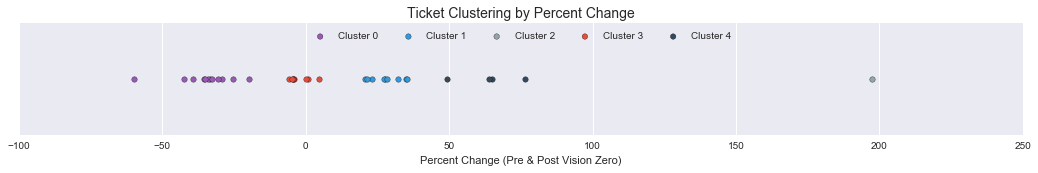

In [12]:
km = KMeans(n_clusters=5, random_state=30)
df['P1'] = km.fit_predict(X.reshape(-1, 1))

groups = df.groupby('P1')

# Plot by groups
fig, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (18, 2))
ax1.axes.get_yaxis().set_ticks([])
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]
for name, group in groups:
    label = 'Cluster ' + str(name)
    ax1.scatter(group['PercentChange'], np.zeros(group['PercentChange'].shape),
                label = label, c = colors[name], s=30)
ax1.set_xlabel('Percent Change (Pre & Post Vision Zero)')
ax1.set_title('Ticket Clustering by Percent Change', fontsize = 14)
ax1.legend(ncol=5, loc='upper center')


In [13]:
df.sort_values('PercentChange', ascending=False)

,Y2011,Y2012,Y2013,Y2014,Y2015,PreVZ_Mean,PostVZ_Mean,PercentChange,zscore,P1
Not_Giving_RofW_to_Pedes,10448.0,11698.0,14888.0,33577.0,39853.0,12344.666667,36715.0,197.42,4.000184,2
School_Bus_Passing_Stopped,2739.0,3312.0,1371.0,5428.0,3298.0,2474.000000,4363.0,76.35,1.444892,4
Not_Giving_RofW_to_Veh,1951.0,2139.0,2335.0,3365.0,3696.0,2141.666667,3530.5,64.85,1.202174,4
Speeding,76493.0,71305.0,83202.0,117767.0,134438.0,77000.000000,126102.5,63.77,1.179379,4
Fail_to_Signal,13879.0,14208.0,18588.0,22088.0,24376.0,15558.333333,23232.0,49.32,0.874399,4
Unsafe_Lane_Change,4836.0,4203.0,4563.0,5880.0,6408.0,4534.000000,6144.0,35.51,0.582926,1
Fail_to_Stop_on_Signal,41644.0,37945.0,41055.0,53445.0,55199.0,40214.666667,54322.0,35.08,0.573851,1
U_Turn,3924.0,3912.0,4921.0,6930.0,4311.0,4252.333333,5620.5,32.17,0.512433,1
Improper_Turn,55601.0,56586.0,62356.0,73234.0,76049.0,58181.000000,74641.5,28.29,0.430542,1
Commercial_Veh_Pkwy,1658.0,864.0,1063.0,1430.0,1618.0,1195.000000,1524.0,27.53,0.414501,1


In [14]:
# Priority 1 & 2 Tickets:
P12 = ['Not_Giving_RofW_to_Pedes', 'School_Bus_Passing_Stopped',
       'Not_Giving_RofW_to_Veh', 'Speeding', 'Fail_to_Signal',]

# Sum priority tickets over each year.
df = df.T
df['P12'] = df[P12].sum(axis=1)
df['Year'] = [2011, 2012, 2013, 2014, 2015, 0, 0, 0, 0, 0,]


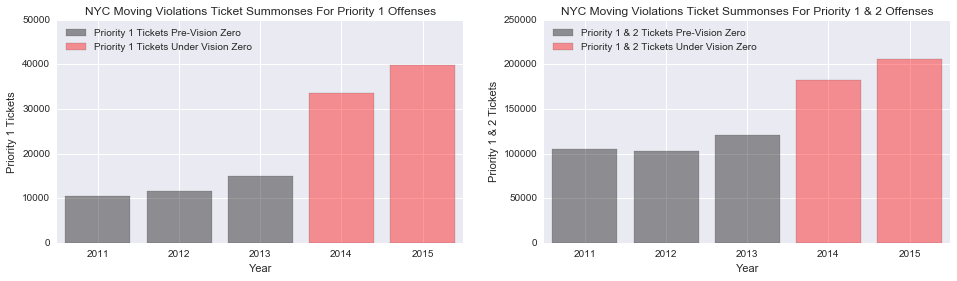

In [15]:
# Plot Change in Priority 1 Tickets
fig1, (ax1, ax2) = pl.subplots(nrows = 1, ncols = 2, figsize = (16, 4))

# Plot Priority 1 Tickets
ax1.get_xaxis().get_major_formatter().set_useOffset(False)
ax1.bar(df.Year[0:3], df['Not_Giving_RofW_to_Pedes'][0:3], color = 'k', alpha = 0.4,
         label = 'Priority 1 Tickets Pre-Vision Zero', align = 'center')
ax1.bar(df.Year[3:5], df['Not_Giving_RofW_to_Pedes'][3:5], color = 'r', alpha = 0.4,
         label = 'Priority 1 Tickets Under Vision Zero', align = 'center')
ax1.set_ylabel('Priority 1 Tickets')
ax1.set_xlabel('Year')
ax1.set_title('NYC Moving Violations Ticket Summonses For Priority 1 Offenses')
ax1.axis([2010.5, 2015.5, 0, 50000])
ax1.legend(loc = 'upper left')

# Plot Priority 1 & 2 Tickets
ax2.get_xaxis().get_major_formatter().set_useOffset(False)
ax2.bar(df.Year[0:3], df['P12'][0:3], color = 'k', alpha = 0.4,
         label = 'Priority 1 & 2 Tickets Pre-Vision Zero', align = 'center')
ax2.bar(df.Year[3:5], df['P12'][3:5], color = 'r', alpha = 0.4,
         label = 'Priority 1 & 2 Tickets Under Vision Zero', align = 'center')
ax2.set_ylabel('Priority 1 & 2 Tickets')
ax2.set_xlabel('Year')
ax2.set_title('NYC Moving Violations Ticket Summonses For Priority 1 & 2 Offenses')
ax2.axis([2010.5, 2015.5, 0, 250000])
ax2.legend(loc = 'upper left')


In [16]:
print ("Change in priority 1 ticketing pre & post Vision Zero (p-value): " + 
       str(sc.ttest_ind(df['Not_Giving_RofW_to_Pedes'][0:3], 
                        df['Not_Giving_RofW_to_Pedes'][3:5], 
                        equal_var = False)[1].round(4)))

print ("Change in priority 1 & 2 ticketing pre & post Vision Zero (p-value): " + 
       str(sc.ttest_ind(df.P12[0:3], df.P12[3:5], equal_var = False)[1].round(4)))


Change in priority 1 ticketing pre & post Vision Zero (p-value): 0.0478
Change in priority 1 & 2 ticketing pre & post Vision Zero (p-value): 0.0476


In [17]:
print 'Difference in P1 Tickets Issued (p-value): ' + str(sc.ttest_ind(preVZ['Not Giving R of W to Pedes.'], postVZ['Not Giving R of W to Pedes.'])[1])
print 'Difference in P1 & 2 Tickets Issued (p-value): ' + str(sc.ttest_ind(preVZ['P12'], postVZ['P12'])[1])
print 'Difference in P1 & 2 & 3 Tickets Issued (p-value): ' + str(sc.ttest_ind(preVZ['P123'], postVZ['P123'])[1])


Difference in P1 Tickets Issued (p-value): 3.81743468571e-10
Difference in P1 & 2 Tickets Issued (p-value): 2.8786087612e-10
Difference in P1 & 2 & 3 Tickets Issued (p-value): 0.00362801841139


#### Findings:
* No change in absolute number of tickets issued.
* Priorities changed.
* Significant difference in priority 1 and priority 1 & 2.

In [18]:
data1 = data[data['Per_Cap_Injury_Per_Thou'] < 20].copy()
data1.columns = [u'Unnamed: 0', u'PrecinctYear', u'Precinct', u'Year', u'Taxis',
       u'Flyers', u'Seniors', u'Outreach', u'HandsOn', u'Edu_Total',
       u'BackingUnsafely', u'BrakeLightsDefectorImproper',
       u'BusLaneDrivingin', u'Cell Phone', u'CommercialVehonPkwy',
       u'DefectiveBrakes', u'DisobeySteadyRedSignal',
       u'DisobeyTrafficControlDevice', u'EquipmentOther',
       u'FailtoKeepRight', u'FailtoSignal', u'FollowingTooClosely',
       u'HeadlightsDefectorImproper', u'ImproperLights',
       u'ImproperPassing', u'ImproperTurn', u'ImproperMissingPlates',
       u'NotGivingRofWtoPedes', u'NotGivingRofWtoVeh',
       u'OneWayStreet', u'OtherMovers', u'PavementMarkings',
       u'SafetyBelt', u'SchoolBus, PassingStopped', u'Speeding',
       u'Spillback', u'TintedWindows', u'TruckRoutes', u'UTurn',
       u'Uninspected', u'Uninsured', u'UnlicensedOperator', u'Unregistered',
       u'P12', u'P123', u'Traf_Total', u'NUMBEROFPERSONSINJURED',
       u'NUMBEROFPERSONSKILLED', u'NUMBEROFPEDESTRIANSINJURED',
       u'NUMBEROFPEDESTRIANSKILLED', u'NUMBEROFCYCLISTINJURED',
       u'NUMBEROFCYCLISTKILLED', u'NUMBEROFMOTORISTINJURED',
       u'NUMBEROFMOTORISTKILLED', u'Neigh_Slow_Zone_Total',
       u'Speed_Bump_Total', u'Shape_Area', u'Shape_Le_1', u'Shape_Leng',
       u'Total_Pop', u'geometry', u'Per_Cap_Injury_Per_Thou',
       u'Injuries_Per_Thou']
data1['P1_PerCap'] = data1['NotGivingRofWtoPedes'] / data1['Total_Pop']
data1['P1_PerArea'] = data1['NotGivingRofWtoPedes'] / data1['Shape_Area']
data1['P1_PerCap2'] = data1['P1_PerCap'] ** 2
data1['P1_PerArea2'] = data1['P1_PerArea'] ** 2
data1['P12_PerCap'] = data1['P12'] / data1['Total_Pop']
data1['P12_PerArea'] = data1['P12'] / data1['Shape_Area']
data1['P12_PerCap2'] = data1['P12_PerCap'] ** 2
data1['P12_PerArea2'] = data1['P12_PerArea'] ** 2

# Does increased Priority 1 ticketing influence injuries?
### Injuries Per Thousand & Per Capita Tickets
#### Linear Models:

In [19]:
for item in data1.columns[46:54]:
    cname = item + '_Per_Thou'
    data1[cname] = data1[item] / (data1['Total_Pop'] / 1000)
    formula = str(cname) + ' ~ P1_PerCap'
    reg = smf.ols(formula, data = data1).fit()
    print (cname[8:] + ' (Coef :' + str(reg.params[1].round(4)) + 
           ', Rsquared: ' + str(reg.rsquared.round(4)) + ', F-stat: ' + str(reg.f_pvalue.round(4)) + ')')

PERSONSINJURED_Per_Thou (Coef :4.2387, Rsquared: 0.0, F-stat: 0.9283)
PERSONSKILLED_Per_Thou (Coef :-0.4652, Rsquared: 0.0043, F-stat: 0.3295)
PEDESTRIANSINJURED_Per_Thou (Coef :47.6917, Rsquared: 0.0501, F-stat: 0.0008)
PEDESTRIANSKILLED_Per_Thou (Coef :-0.0578, Rsquared: 0.0001, F-stat: 0.8618)
CYCLISTINJURED_Per_Thou (Coef :26.9472, Rsquared: 0.0363, F-stat: 0.0044)
CYCLISTKILLED_Per_Thou (Coef :0.3055, Rsquared: 0.0294, F-stat: 0.0105)
MOTORISTINJURED_Per_Thou (Coef :-70.4003, Rsquared: 0.0153, F-stat: 0.0662)
MOTORISTKILLED_Per_Thou (Coef :-0.713, Rsquared: 0.0294, F-stat: 0.0104)


[0, 0.02, 0, 0.12]

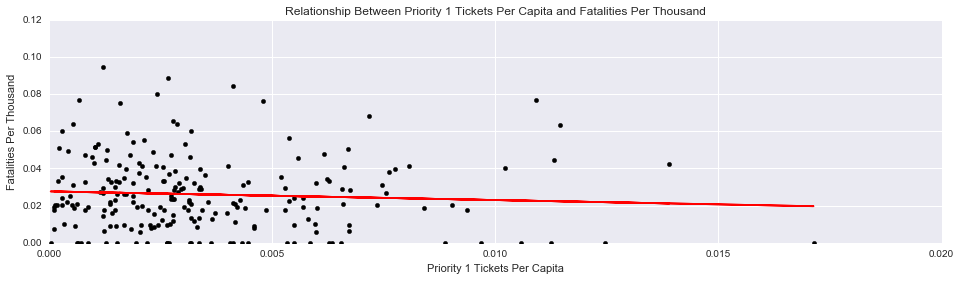

In [20]:
reg = smf.ols('NUMBEROFPERSONSKILLED_Per_Thou ~ P1_PerCap', data=data1).fit()

fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.scatter(data1['P1_PerCap'], data1['NUMBEROFPERSONSKILLED_Per_Thou'], c='k')
ax1.plot(data1['P1_PerCap'], reg.predict(), c='r')
ax1.set_xlabel('Priority 1 Tickets Per Capita')
ax1.set_ylabel('Fatalities Per Thousand')
ax1.set_title('Relationship Between Priority 1 Tickets Per Capita and Fatalities Per Thousand')
ax1.axis([0, 0.02, 0, 0.12])

#### Polynomial Model:

In [21]:
for item in data1.columns[46:54]:
    cname = item + '_Per_Thou'
    formula = str(cname) + ' ~ P1_PerCap2'
    reg = smf.ols(formula, data = data1).fit()
    print (cname[8:] + ' (Coef :' + str(reg.params[1].round(4)) + ', Rsquared: ' + 
           str(reg.rsquared.round(4)) + ', F-stat: ' + str(reg.f_pvalue.round(4)) + ')')

PERSONSINJURED_Per_Thou (Coef :-170.7039, Rsquared: 0.0, F-stat: 0.9645)
PERSONSKILLED_Per_Thou (Coef :-30.2704, Rsquared: 0.0028, F-stat: 0.4355)
PEDESTRIANSINJURED_Per_Thou (Coef :2822.5268, Rsquared: 0.0265, F-stat: 0.0151)
PEDESTRIANSKILLED_Per_Thou (Coef :-19.1686, Rsquared: 0.0023, F-stat: 0.4776)
CYCLISTINJURED_Per_Thou (Coef :1453.3324, Rsquared: 0.016, F-stat: 0.0601)
CYCLISTKILLED_Per_Thou (Coef :22.8769, Rsquared: 0.0249, F-stat: 0.0186)
MOTORISTINJURED_Per_Thou (Coef :-4446.5631, Rsquared: 0.0092, F-stat: 0.1543)
MOTORISTKILLED_Per_Thou (Coef :-33.9787, Rsquared: 0.0101, F-stat: 0.1353)


### Injuries Per Thousand & Per Square Mile Tickets

In [22]:
for item in data1.columns[46:54]:
    cname = item + '_Per_Thou'
    formula = str(cname) + ' ~ P1_PerArea'
    reg = smf.ols(formula, data = data1).fit()
    print (cname[8:] + ' (Coef :' + str(reg.params[1].round(4)) + ', Rsquared: ' +
           str(reg.rsquared.round(4)) + ', F-stat: ' + str(reg.f_pvalue.round(4)) + ')')

PERSONSINJURED_Per_Thou (Coef :-0.0019, Rsquared: 0.0453, F-stat: 0.0014)
PERSONSKILLED_Per_Thou (Coef :-0.0, Rsquared: 0.0325, F-stat: 0.0071)
PEDESTRIANSINJURED_Per_Thou (Coef :0.0004, Rsquared: 0.0252, F-stat: 0.0179)
PEDESTRIANSKILLED_Per_Thou (Coef :-0.0, Rsquared: 0.0019, F-stat: 0.5184)
CYCLISTINJURED_Per_Thou (Coef :0.0004, Rsquared: 0.0494, F-stat: 0.0009)
CYCLISTKILLED_Per_Thou (Coef :0.0, Rsquared: 0.0118, F-stat: 0.1067)
MOTORISTINJURED_Per_Thou (Coef :-0.0028, Rsquared: 0.1407, F-stat: 0.0)
MOTORISTKILLED_Per_Thou (Coef :-0.0, Rsquared: 0.0912, F-stat: 0.0)


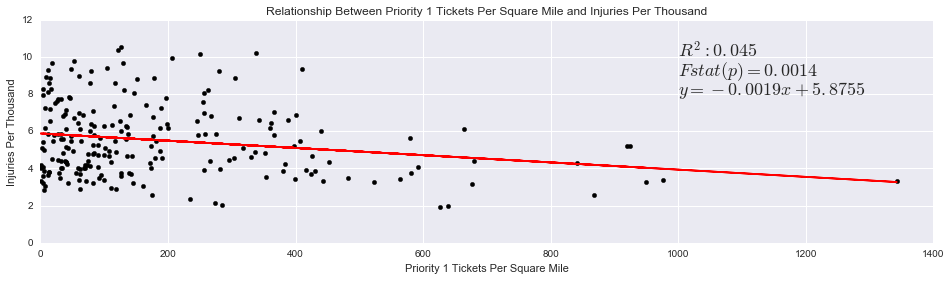

In [23]:
reg = smf.ols('NUMBEROFPERSONSINJURED_Per_Thou ~ P1_PerArea', data=data1).fit()

fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.scatter(data1['P1_PerArea'], data1['NUMBEROFPERSONSINJURED_Per_Thou'], c='k')
ax1.plot(data1['P1_PerArea'], reg.predict(), c='r')
ax1.set_xlabel('Priority 1 Tickets Per Square Mile')
ax1.set_ylabel('Injuries Per Thousand')
ax1.set_title('Relationship Between Priority 1 Tickets Per Square Mile and Injuries Per Thousand')
ax1.axis([0, 1400, 0, 12])
ax1.text(1000, 8, '$y=-0.0019x + 5.8755$', fontsize=18, family='serif')
ax1.text(1000, 9, '$Fstat (p)=0.0014$', fontsize=18, family='serif')
ax1.text(1000, 10, '$R^2: 0.045$', fontsize=18, family='serif')


In [24]:
-5.8755 / -0.0019

3092.368421052631

In [25]:
for item in data1.columns[46:54]:
    cname = item + '_Per_Thou'
    formula = str(cname) + ' ~ P1_PerArea2'
    reg = smf.ols(formula, data = data1).fit()
    print (cname[8:] + ' (Coef :' + str(reg.params[1]) + ', Rsquared: ' +
           str(reg.rsquared.round(4)) + ', F-stat: ' + str(reg.f_pvalue.round(4)) + ')')

PERSONSINJURED_Per_Thou (Coef :-2.2043721483e-06, Rsquared: 0.0484, F-stat: 0.001)
PERSONSKILLED_Per_Thou (Coef :-1.62722826166e-08, Rsquared: 0.0257, F-stat: 0.0169)
PEDESTRIANSINJURED_Per_Thou (Coef :9.4994648652e-08, Rsquared: 0.001, F-stat: 0.6454)
PEDESTRIANSKILLED_Per_Thou (Coef :-6.06934802011e-09, Rsquared: 0.0074, F-stat: 0.2021)
CYCLISTINJURED_Per_Thou (Coef :2.5159604887e-07, Rsquared: 0.0154, F-stat: 0.0652)
CYCLISTKILLED_Per_Thou (Coef :2.11697505914e-09, Rsquared: 0.0069, F-stat: 0.2193)
MOTORISTINJURED_Per_Thou (Coef :-2.55096284582e-06, Rsquared: 0.0972, F-stat: 0.0)
MOTORISTKILLED_Per_Thou (Coef :-1.23199096557e-08, Rsquared: 0.0427, F-stat: 0.002)


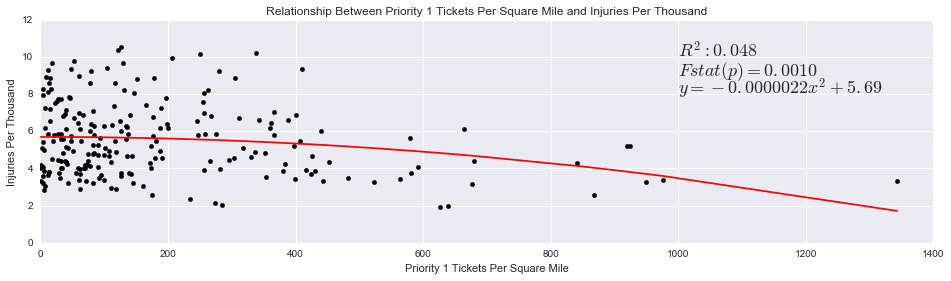

In [26]:
data1.sort_values('P1_PerArea', inplace=True)
reg = smf.ols('NUMBEROFPERSONSINJURED_Per_Thou ~ P1_PerArea2', data=data1).fit()
fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.scatter(data1['P1_PerArea'], data1['NUMBEROFPERSONSINJURED_Per_Thou'], c='k')
ax1.plot(data1['P1_PerArea'], reg.predict(), c='r')
ax1.set_xlabel('Priority 1 Tickets Per Square Mile')
ax1.set_ylabel('Injuries Per Thousand')
ax1.set_title('Relationship Between Priority 1 Tickets Per Square Mile and Injuries Per Thousand')
ax1.axis([0, 1400, 0, 12])
ax1.text(1000, 8, '$y = -0.0000022x^2 + 5.69$', fontsize=18, family='serif')
ax1.text(1000, 9, '$Fstat (p)=0.0010$', fontsize=18, family='serif')
ax1.text(1000, 10, '$R^2: 0.048$', fontsize=18, family='serif')


In [27]:
print np.sqrt(-5.69 / -0.0000022)
data1[data1['P1_PerArea'] > 800]#.head(10)

1608.21753391


,Unnamed: 0,PrecinctYear,Precinct,Year,Taxis,Flyers,Seniors,Outreach,HandsOn,Edu_Total,BackingUnsafely,BrakeLightsDefectorImproper,BusLaneDrivingin,Cell Phone,CommercialVehonPkwy,DefectiveBrakes,DisobeySteadyRedSignal,DisobeyTrafficControlDevice,EquipmentOther,FailtoKeepRight,FailtoSignal,FollowingTooClosely,HeadlightsDefectorImproper,ImproperLights,ImproperPassing,ImproperTurn,ImproperMissingPlates,NotGivingRofWtoPedes,NotGivingRofWtoVeh,OneWayStreet,OtherMovers,PavementMarkings,SafetyBelt,"SchoolBus, PassingStopped",Speeding,Spillback,TintedWindows,TruckRoutes,UTurn,Uninspected,Uninsured,UnlicensedOperator,Unregistered,P12,P123,Traf_Total,NUMBEROFPERSONSINJURED,NUMBEROFPERSONSKILLED,NUMBEROFPEDESTRIANSINJURED,NUMBEROFPEDESTRIANSKILLED,NUMBEROFCYCLISTINJURED,NUMBEROFCYCLISTKILLED,NUMBEROFMOTORISTINJURED,NUMBEROFMOTORISTKILLED,Neigh_Slow_Zone_Total,Speed_Bump_Total,Shape_Area,Shape_Le_1,Shape_Leng,Total_Pop,geometry,Per_Cap_Injury_Per_Thou,Injuries_Per_Thou,P1_PerCap,P1_PerArea,P1_PerCap2,P1_PerArea2,P12_PerCap,P12_PerArea,P12_PerCap2,P12_PerArea2,NUMBEROFPERSONSINJURED_Per_Thou,NUMBEROFPERSONSKILLED_Per_Thou,NUMBEROFPEDESTRIANSINJURED_Per_Thou,NUMBEROFPEDESTRIANSKILLED_Per_Thou,NUMBEROFCYCLISTINJURED_Per_Thou,NUMBEROFCYCLISTKILLED_Per_Thou,NUMBEROFMOTORISTINJURED_Per_Thou,NUMBEROFMOTORISTKILLED_Per_Thou
68,68,232015,23.0,2015,2,0,1,6,2,11,8,55,8,1800,0,0,907,779,143,2,63,1,68,0,51,870,44,648,9,59,34,21,540,53,251,1,135,53,3,5,41,151,22,1024,3722,6825,312,0,75,0,36,0,201,0,0.0,6.0,0.770005,19438.111994,19438.112089,73106.0,MULTIPOLYGON (((-73.93519039313171 40.79147115...,4.267776,4.267776,0.008864,841.553306,0.000079,7.082120e+05,0.014007,1329.862014,0.000196,1.768533e+06,4.267776,0.000000,1.025908,0.000000,0.492436,0.000000,2.749432,0.0
100,100,302014,30.0,2014,1,0,1,4,0,6,25,237,0,1416,0,2,883,826,8,0,69,6,107,1,90,939,21,587,25,3,3,81,798,72,371,10,184,241,190,15,122,356,29,1124,4252,7717,157,0,55,0,19,0,83,0,0.0,1.0,0.675672,21628.588458,21628.589420,60685.0,POLYGON ((-73.94016749551115 40.83038305378005...,2.587130,2.587130,0.009673,868.764628,0.000094,7.547520e+05,0.018522,1663.528862,0.000343,2.767328e+06,2.587130,0.000000,0.906320,0.000000,0.313092,0.000000,1.367719,0.0
146,146,282015,28.0,2015,0,0,4,4,0,8,16,144,25,870,0,0,1000,1888,200,2,73,0,119,2,15,1094,31,504,26,33,14,27,877,17,355,21,301,232,329,43,214,264,98,975,5579,8834,234,0,57,0,36,0,141,0,0.0,4.0,0.548416,17100.184612,17100.184325,44781.0,POLYGON ((-73.94131742355373 40.80771334575683...,5.225430,5.225430,0.011255,919.010398,0.000127,8.445801e+05,0.021773,1777.847496,0.000474,3.160742e+06,5.225430,0.000000,1.272861,0.000000,0.803912,0.000000,3.148657,0.0
145,145,282014,28.0,2014,1,0,3,8,0,12,11,125,18,1262,0,0,1045,1540,78,17,87,5,136,0,11,685,3,507,124,13,31,36,1263,16,543,37,269,119,501,68,186,235,80,1277,5212,9051,233,2,68,1,47,1,118,0,0.0,2.0,0.548416,17100.184612,17100.184325,44781.0,POLYGON ((-73.94131742355373 40.80771334575683...,5.203100,5.203100,0.011322,924.480698,0.000128,8.546646e+05,0.028517,2328.524361,0.000813,5.422026e+06,5.203100,0.044662,1.518501,0.022331,1.049552,0.022331,2.635046,0.0
101,101,302015,30.0,2015,4,0,0,2,3,9,19,106,0,1194,1,6,1037,1248,3,7,236,3,40,0,11,816,8,642,30,2,20,58,452,31,570,4,179,169,5,14,116,299,37,1509,4832,7363,197,0,52,0,22,0,123,0,0.0,1.0,0.675672,21628.588458,21628.589420,60685.0,POLYGON ((-73.94016749551115 40.83038305378005...,3.246272,3.246272,0.010579,950.165062,0.000112,9.028136e+05,0.024866,2233.331897,0.000618,4.987771e+06,3.246272,0.000000,0.856884,0.000000,0.362528,0.000000,2.026860,0.0
64,64,62014,6.0,2014,0,0,0,3,0,3,17,103,0,1371,2,5,1154,1313,1,2,76,3,182,0,48,1100,3,775,11,165,102,865,1098,92,99,14,192,4,26,5,290,234,25,1053,4774,9377,210,0,82,0,43,0,85,0,0.0,0.0,0.793827,27182.397821,27182.687617,62226.0,POLYGON ((-73.99968392197817 40.73855224786502...,3.374795,3.374795,0.012455,976.283065,0.000155,9.531286e+05,0.016922,1326.485248,0.000286,1.759563e+06,3.374795,0.000000,1.317777,0.000000,0

# Does Increased Priority 1 & 2 Ticketing Influence Injuries?
### Injuries Per Thousand & Per Capita Tickets
#### Linear Models:

In [28]:
for item in data1.columns[46:54]:
    cname = item + '_Per_Thou'
    formula = str(cname) + ' ~ P12_PerCap'
    reg = smf.ols(formula, data = data1).fit()
    print (cname[8:] + ' (Coef :' + str(reg.params[1].round(4)) + ', Rsquared: ' + str(reg.rsquared.round(4)) + ')')

PERSONSINJURED_Per_Thou (Coef :10.0773, Rsquared: 0.0013)
PERSONSKILLED_Per_Thou (Coef :-0.003, Rsquared: 0.0)
PEDESTRIANSINJURED_Per_Thou (Coef :7.3074, Rsquared: 0.0071)
PEDESTRIANSKILLED_Per_Thou (Coef :0.0387, Rsquared: 0.0004)
CYCLISTINJURED_Per_Thou (Coef :2.8161, Rsquared: 0.0024)
CYCLISTKILLED_Per_Thou (Coef :0.0646, Rsquared: 0.0079)
MOTORISTINJURED_Per_Thou (Coef :-0.0462, Rsquared: 0.0)
MOTORISTKILLED_Per_Thou (Coef :-0.1063, Rsquared: 0.0039)


#### Polynomial Model

In [29]:
for item in data1.columns[46:54]:
    cname = item + '_Per_Thou'
    formula = str(cname) + ' ~ P12_PerCap2'
    reg = smf.ols(formula, data = data1).fit()
    print (cname[8:] + ' (Coef :' + str(reg.params[1].round(4)) + ', Rsquared: ' + str(reg.rsquared.round(4)) + ')')

PERSONSINJURED_Per_Thou (Coef :376.3272, Rsquared: 0.0018)
PERSONSKILLED_Per_Thou (Coef :4.3275, Rsquared: 0.0023)
PEDESTRIANSINJURED_Per_Thou (Coef :213.6917, Rsquared: 0.0061)
PEDESTRIANSKILLED_Per_Thou (Coef :2.8376, Rsquared: 0.002)
CYCLISTINJURED_Per_Thou (Coef :59.1363, Rsquared: 0.0011)
CYCLISTKILLED_Per_Thou (Coef :1.8278, Rsquared: 0.0063)
MOTORISTINJURED_Per_Thou (Coef :103.4992, Rsquared: 0.0002)
MOTORISTKILLED_Per_Thou (Coef :-0.3379, Rsquared: 0.0)


### Injuries Per Thousand & Per Area Tickets
#### Linear Model

In [30]:
for item in data1.columns[46:54]:
    cname = item + '_Per_Thou'
    formula = str(cname) + ' ~ P12_PerArea'
    reg = smf.ols(formula, data = data1).fit()
    print (cname[8:] + ' (Coef :' + str(reg.params[1].round(4)) + ', Rsquared: ' + str(reg.rsquared.round(4)) + ')')

PERSONSINJURED_Per_Thou (Coef :-0.0006, Rsquared: 0.0246)
PERSONSKILLED_Per_Thou (Coef :-0.0, Rsquared: 0.0294)
PEDESTRIANSINJURED_Per_Thou (Coef :0.0002, Rsquared: 0.0293)
PEDESTRIANSKILLED_Per_Thou (Coef :-0.0, Rsquared: 0.0002)
CYCLISTINJURED_Per_Thou (Coef :0.0001, Rsquared: 0.03)
CYCLISTKILLED_Per_Thou (Coef :0.0, Rsquared: 0.0039)
MOTORISTINJURED_Per_Thou (Coef :-0.0009, Rsquared: 0.0895)
MOTORISTKILLED_Per_Thou (Coef :-0.0, Rsquared: 0.0925)


#### Polynomial Model

In [31]:
for item in data1.columns[46:54]:
    cname = item + '_Per_Thou'
    formula = str(cname) + ' ~ P12_PerArea2'
    reg = smf.ols(formula, data = data1).fit()
    print (cname[8:] + ' (Coef :' + str(reg.params[1]) + ', Rsquared: ' + str(reg.rsquared.round(4)) + ')')

PERSONSINJURED_Per_Thou (Coef :-3.38292133559e-07, Rsquared: 0.0292)
PERSONSKILLED_Per_Thou (Coef :-2.77576416565e-09, Rsquared: 0.0191)
PEDESTRIANSINJURED_Per_Thou (Coef :5.16175785313e-08, Rsquared: 0.0073)
PEDESTRIANSKILLED_Per_Thou (Coef :-2.81851239723e-10, Rsquared: 0.0004)
CYCLISTINJURED_Per_Thou (Coef :4.37666796985e-08, Rsquared: 0.0119)
CYCLISTKILLED_Per_Thou (Coef :2.70814040722e-10, Rsquared: 0.0029)
MOTORISTINJURED_Per_Thou (Coef :-4.33676391789e-07, Rsquared: 0.0721)
MOTORISTKILLED_Per_Thou (Coef :-2.76472696665e-09, Rsquared: 0.0551)
